# **📌 Task 1: Social Media Trend Analysis**


---


In this task, we analyze social media posts to identify trending topics and understand public sentiment.  

The goal is to:
- Discover common keywords and themes from social media text.
- Perform sentiment analysis to gauge user opinions.
- Analyze engagement metrics (likes, retweets) and temporal trends.  

This analysis helps businesses monitor public interests, improve content strategies, and make informed decisions based on real-time social media data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import re
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Load CSV file
df = pd.read_csv('/content/drive/MyDrive/twitter_dataset.csv')

# Preview data
print(df.head())
print(df.info())


   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  
3  2023-04-10 22:06:29  
4  2023-01-24 07:12:21  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 


In [4]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

df['Clean_Text'] = df['Text'].apply(clean_text)


In [5]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Clean_Text'].apply(get_sentiment)


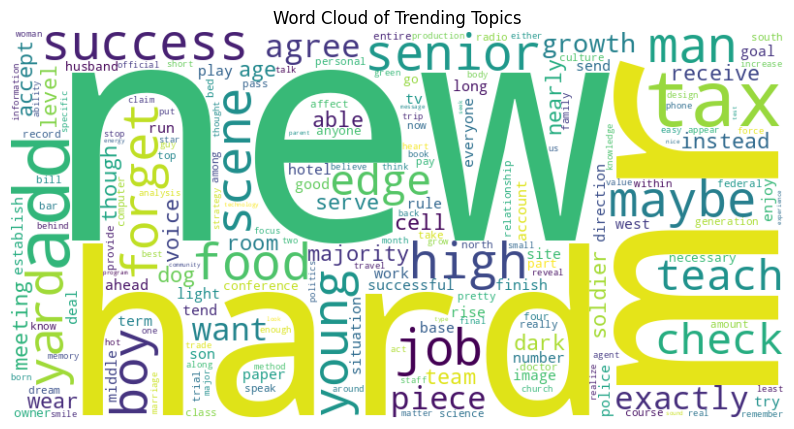

In [6]:
text_combined = ' '.join(df['Clean_Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Trending Topics')
plt.show()


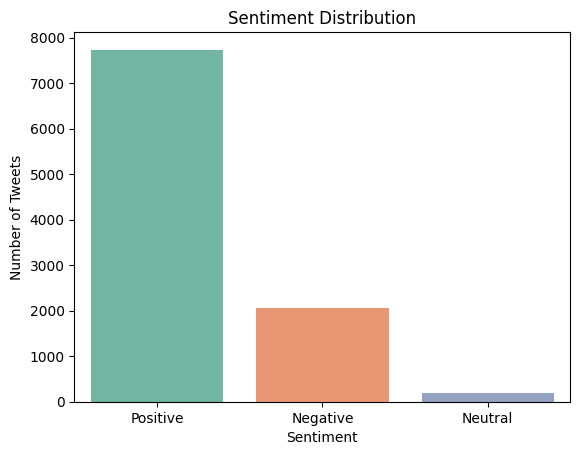

In [8]:
sns.countplot(data=df, x='Sentiment',hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

  Sentiment      Likes   Retweets
0  Negative  49.702807  49.659729
1   Neutral  54.272277  51.202970
2  Positive  49.876358  49.698914


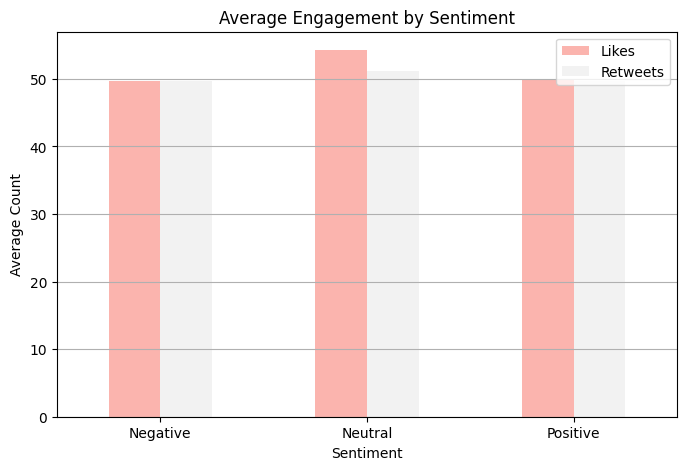

In [9]:
# Average likes and retweets by sentiment
engagement_stats = df.groupby('Sentiment')[['Likes', 'Retweets']].mean().reset_index()

print(engagement_stats)

# Plot
engagement_stats.plot(x='Sentiment', kind='bar', figsize=(8, 5), colormap='Pastel1')
plt.title('Average Engagement by Sentiment')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [10]:
top_users = df.sort_values(by=['Likes', 'Retweets'], ascending=False).head(5)
print(top_users[['Username', 'Likes', 'Retweets', 'Text']])


             Username  Likes  Retweets  \
2818  brandihernandez    100       100   
3574      josephjones    100        98   
5214            roy45    100        95   
1077        william28    100        93   
9773      lauracarter    100        93   

                                                   Text  
2818  Letter either organization development. Power ...  
3574  Short successful line city also.\nDifficult te...  
5214  Rich citizen reality drug. Offer leave market ...  
1077  Join accept music whole large part practice. P...  
9773  Charge a into. Control wear college. Yet befor...  


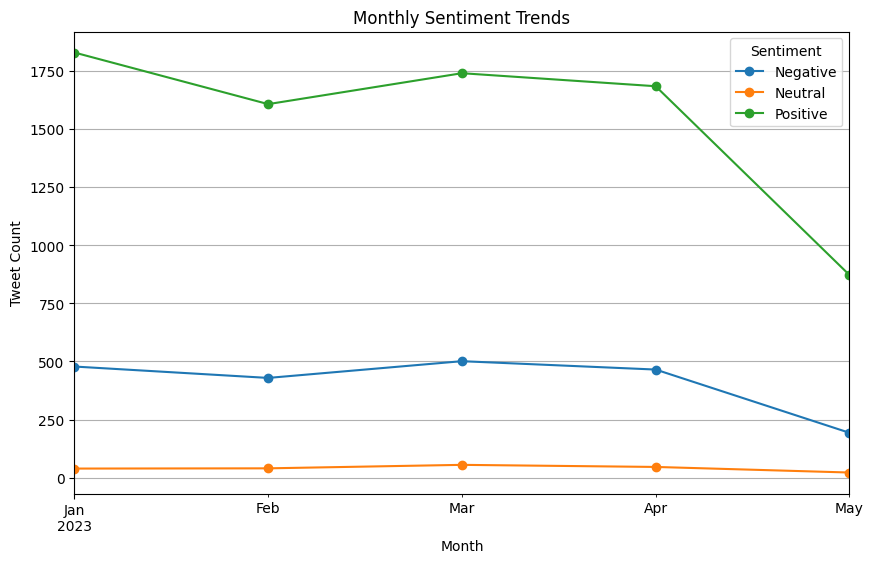

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.to_period('M')

monthly_sentiment = df.groupby(['Month', 'Sentiment']).size().unstack().fillna(0)
monthly_sentiment.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Sentiment Trends')
plt.ylabel('Tweet Count')
plt.xlabel('Month')
plt.grid(True)
plt.show()


**Recommendation**:  
To harness the power of social media insights, businesses should:
- Monitor emerging topics in real time to align marketing strategies.
- Tailor content to promote positive engagement and reduce negative sentiment.
- Leverage data to identify potential brand ambassadors or community influencers.